# 범주형 데이터 전처리
- 사이킷런은 문자열 값을 입력 값으로 처리 하지 않기 때문에 숫자 형으로 변환해야 한다.

## 범주형 변수(Categorical Variable)
- 몇 개의 범주 중 하나에 속하는 값들로 구성된 변수. 어떤 분류에 대한 속성을 가지는 변수를 말한다.
    - 예) 성별 - 남/녀, 혈액형 - A, B, AB, O, 성적 - A,B,C,D,E
- 비서열(Unordered) 변수 
    - 범주에 속한 값간에 서열(순위)가 없는 변수
    - 성별, 혈액형
- 서열 (Ordered) 변수
    - 범주에 속한 값 간에 서열(순위)가 있는 변수
    - 성적, 직급
- 사이킷런은 문자열 값을 입력 값으로 처리 하지 않기 때문에 숫자 형으로 변환해야 한다.
    - 범주형 변수의 경우 전처리를 통해 정수값으로 변환한다.
    - 범주형이 아닌 단순 문자열인 경우 일반적으로 제거한다.

## 범주형 Feature의 처리
- Label Encoding
- One hot Encoding 

## 레이블 인코딩(Label encoding)


- 문자열(범주형) 값을 내림차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
- **숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
- **숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

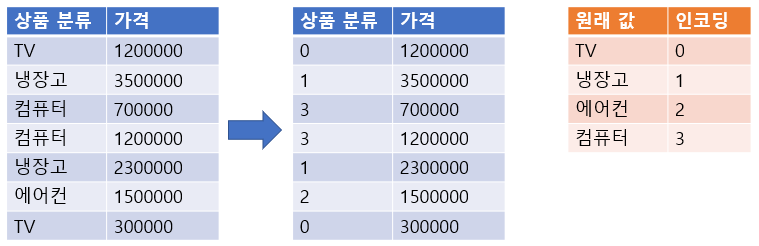

- **sklearn.preprocessing.LabelEncoder** 사용
    - fit(): 어떻게 변환할 지 학습
    - transform(): 문자열를 숫자로 변환
    - fit_transform(): 학습과 변환을 한번에 처리
    - inverse_transform():숫자를 문자열로 변환
    - classes_ : 인코딩한 클래스 조회

### adult data 에 label encoding 적용
- 데이터셋은 1994년  인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋이다.
- target 은 income 이며 수입이 $50,000 이하인지 초과인지로 분류되 있다.
- https://archive.ics.uci.edu/ml/datasets/adult

In [ ]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

# TODO: encoding_columns 레이블 인코딩 처리

- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week','native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss'

In [ ]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

## 원핫 인코딩(One-Hot encoding)
- N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    - 고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
- 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 라벨 인코딩 보다 원핫 인코딩을 사용한다.
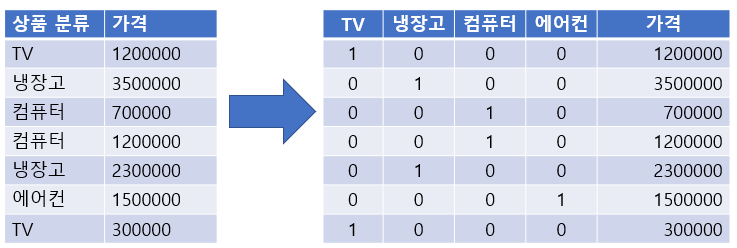

- **사이킷런**
    - sklearn.preprocessing.OneHotEncoder 이용
        - fit(): 어떻게 변환할 지 학습
        - transform(): 문자열를 숫자로 변환
        - fit_transform(): 학습과 변환을 한번에 처리
        - get_feature_names() : 원핫인코딩으로 변환된 컬럼의 이름을 반환
    - DataFrame을 넣을 경우 모든 변수들을 변환한다. 
        - 범주형 컬럼만 처리하도록 해야 한다.
- **Pandas**
    - pandas.get_dummies(DataFrame [, columns=[변환할 컬럼명]]) 함수 이용
    - DataFrame에서 범주형(문자열) 변수만 변환한다.
    
> 범주형 변수의 값을 숫자 값을 가지는 경우가 있다. (ex: 별점)    
> 이런 경우 get_dummies() columns=['컬럼명','컬럼명'] 매개변수로 컬럼들을 명시한다.

> sparse를 False로 주지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.     
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.   
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.

### 판다스 pd.get_dummies(df) 이용

## adult dataset에 one-hot encoding 적용

In [ ]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']


# TODO adult 데이터셋의 범주형(categoical) 컬럼을 one hot encoding 한다.
- 범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week','native-country', 'income'
- 연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss'
- **위의 컬럼들중 'age','workclass','education', 'occupation', 'gender', 'hours-per-week', 'income' 만 사용한다.**
- **income 은 Label Encoding으로 처리한다.**
    - output 데이터

# 연속형(수치형) 데이터 전처리
## Feature Scaling(정규화)
- 각 피처가 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
- 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받는다.
    - 선형모델, SVM 모델, 신경망 모델 등
- **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**

## 종류
- 표준화(Standardization)
- Min Max Scaling

## 함수
- fit(): 어떻게 변환할 지 학습
- transform(): 변환
- fit_transform(): 학습과 변환을 한번에 처리 

##  표준화(StandardScaler)
- 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환한다.
    - 0을 기준으로 모든 데이터들이 모여있게 된다
- 특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에 표준화를 하면 대부분의 경우 성능이 향상된다.

$$
New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
\mu-평균,\;  \sigma-표준편차
$$

- sklearn.preprocessing.StandardScaler 를 이용

## MinMaxScaler
- 데이터셋의 모든 값을 0과 1 사이의 값으로 변환한다.
$$
New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
$$

### 위스콘신 유방암 데이터셋
- 위스콘신 대학교에서 제공한 유방암 진단결과 데이터
- ID, 암측정값들, 진단결과 컬럼들로 구성
- 사이킷런에서 제공. load_breast_cancer() 함수 이용